In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import assessment
from sklearn.metrics import r2_score

In [2]:
refls = np.loadtxt('../EMIT-scenes/refl_1k.txt')
wv = np.loadtxt('../EMIT-scenes/wv_1k.txt')
df = pd.DataFrame(refls)
df['wv'] = wv
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,wv
0,0.204741,0.197175,0.191094,0.183757,0.176931,0.170667,0.163259,0.156790,0.149403,0.143051,...,0.008419,0.007556,0.006943,0.007534,0.006608,0.005288,0.005188,0.003175,0.002177,0.730501
1,0.212543,0.205032,0.198230,0.191868,0.185520,0.181054,0.175790,0.169040,0.163979,0.158545,...,0.031703,0.030989,0.016408,0.021509,0.018800,0.011752,0.009750,0.006126,0.003743,3.903775
2,0.257069,0.247040,0.239279,0.235955,0.229980,0.225172,0.220556,0.213525,0.208892,0.204352,...,0.048935,0.047420,0.036086,0.035361,0.032842,0.028992,0.024074,0.016344,0.010617,2.440262
3,0.228153,0.222575,0.218219,0.216051,0.211564,0.209291,0.206787,0.202573,0.200234,0.198054,...,0.019022,0.018087,0.010125,0.011289,0.010260,0.006571,0.005258,0.003041,0.001571,3.679452
4,0.207697,0.197579,0.187289,0.181697,0.174680,0.167442,0.160679,0.151619,0.145198,0.139652,...,0.006137,0.005005,0.004977,0.005275,0.004483,0.003734,0.003194,0.001900,0.001467,1.478675


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

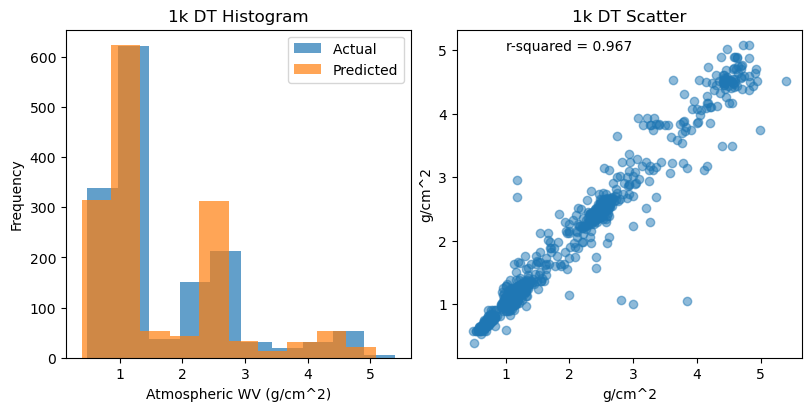

In [4]:
assessment.plot_hist_and_scatter(y_test, y_pred, '1k DT Histogram', '1k DT Scatter')

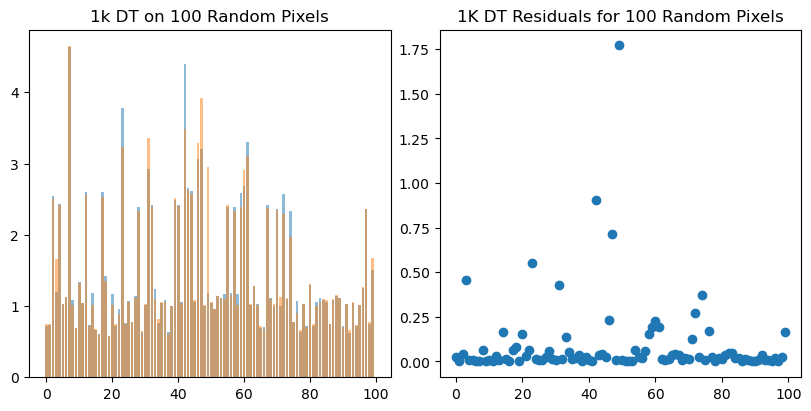

In [5]:
indices = np.random.randint(0, y_test.shape[0], 100)
test, pred = assessment.random_select(y_test, y_pred, indices)
assessment.plot_bar_and_residuals(test, pred, '1k DT on 100 Random Pixels', '1K DT Residuals for 100 Random Pixels')

In [6]:
import pickle
file_name = '../default_scikit_rfr.pkl'
with open(file_name, 'rb') as f:
    rf1k = pickle.load(f)
y_pred = rf1k.predict(X_test)

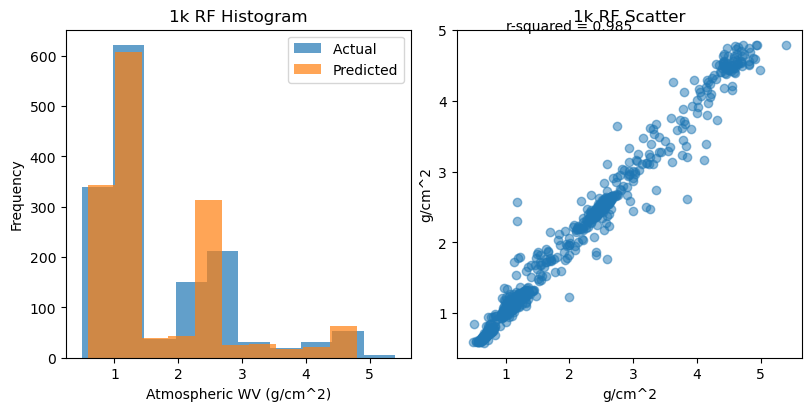

In [7]:
assessment.plot_hist_and_scatter(y_test, y_pred, '1k RF Histogram', '1k RF Scatter')

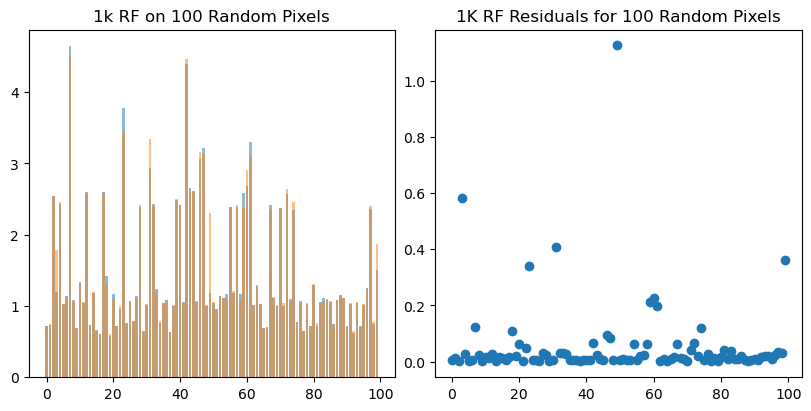

In [8]:
test, pred = assessment.random_select(y_test, y_pred, indices)
assessment.plot_bar_and_residuals(test, pred, '1k RF on 100 Random Pixels', '1K RF Residuals for 100 Random Pixels')

from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(random_state = 0)
scores = cross_val_score(rf, X_train, y_train, cv=5)

#This one is trained on 10k datapoints, or I guess 7500

scores